In [ ]:
pip install pywaffle

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
from pywaffle import Waffle 
import plotly.express as px

In [5]:
df_HD = pd.read_excel("Cardiac_Outcomes.xlsx", "Hospitalization_Discharge")
df_CC = pd.read_excel("Cardiac_Outcomes.xlsx", "CardiacComplications")
df_Res = pd.read_excel("Cardiac_Outcomes.xlsx", "Responsivenes")
df_PH = pd.read_excel("Cardiac_Outcomes.xlsx", "PatientHistory")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", "Labs")
df_Demography = pd.read_excel("Cardiac_Outcomes.xlsx", "Demography")
df_Ppres = pd.read_excel("Cardiac_Outcomes.xlsx", "Patient_Precriptions")


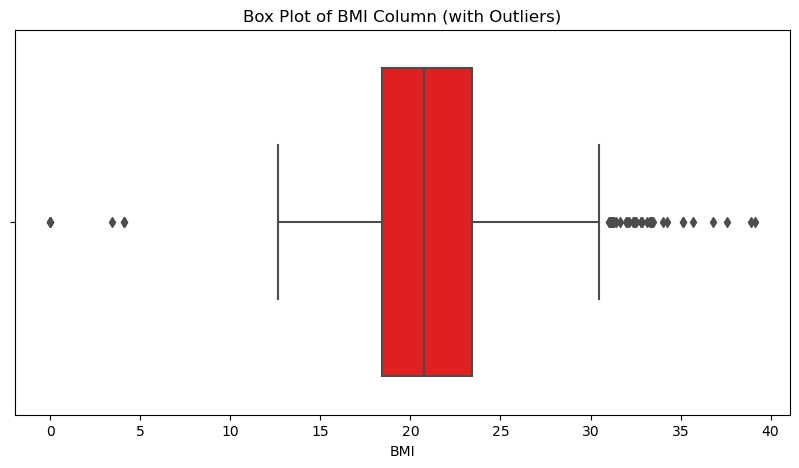

In [11]:
#1.showing outliers in BMI column using box plot


df = df_Demography.copy()

# Plotting the box plot to visualize the distribution of BMI
plt.figure(figsize=(10, 5))
sns.boxplot(x='BMI', data=df, orient='h', color='Red', fliersize=5, linewidth=1.5)
plt.title('Box Plot of BMI Column (with Outliers)')
plt.xlabel('BMI')
plt.show()

<Figure size 1000x600 with 0 Axes>

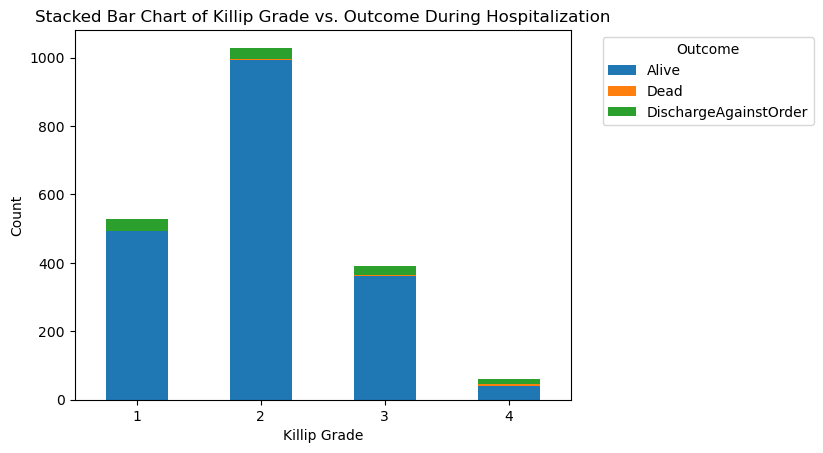

In [12]:
#2. Bar Chart of Killip Grade vs. Outcome During Hospitalization


merged_data = pd.merge(df_CC[['inpatient_number', 'Killip_grade']], 
                        df_HD[['inpatient_number', 'outcome_during_hospitalization']],
                        on='inpatient_number', how='inner')

# Group by 'killip_grade' and 'outcome_during_hospitalization' and count occurrences
grouped_counts = merged_data.groupby(['Killip_grade', 'outcome_during_hospitalization']).size().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Killip Grade vs. Outcome During Hospitalization')
plt.xlabel('Killip Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left') 
autopct='%1.1f%%'

plt.show()

<Figure size 1000x600 with 0 Axes>

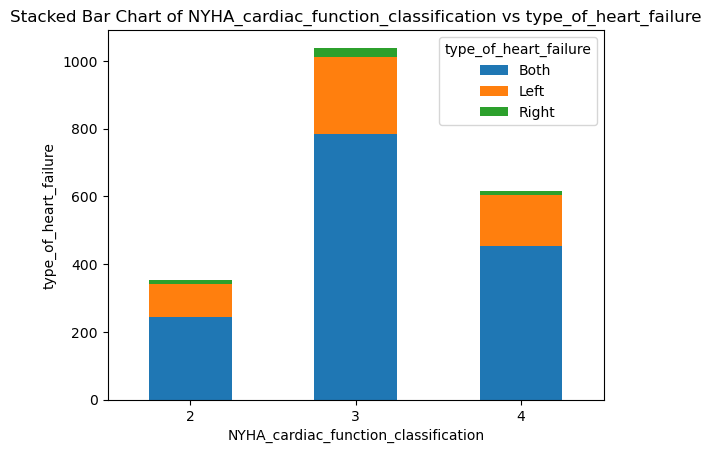

In [6]:
#3.Stacked Bar Chart of NYHA_cardiac_function_classification vs type_of_heart_failure


df =df_CC[['type_of_heart_failure', 'NYHA_cardiac_function_classification']]
                        

grouped_counts = df.groupby(['NYHA_cardiac_function_classification', 'type_of_heart_failure']).size().unstack()


plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of NYHA_cardiac_function_classification vs type_of_heart_failure')
plt.xlabel('NYHA_cardiac_function_classification')
plt.ylabel('type_of_heart_failure')
plt.xticks(rotation=0) 
plt.show()

<Figure size 1000x600 with 0 Axes>

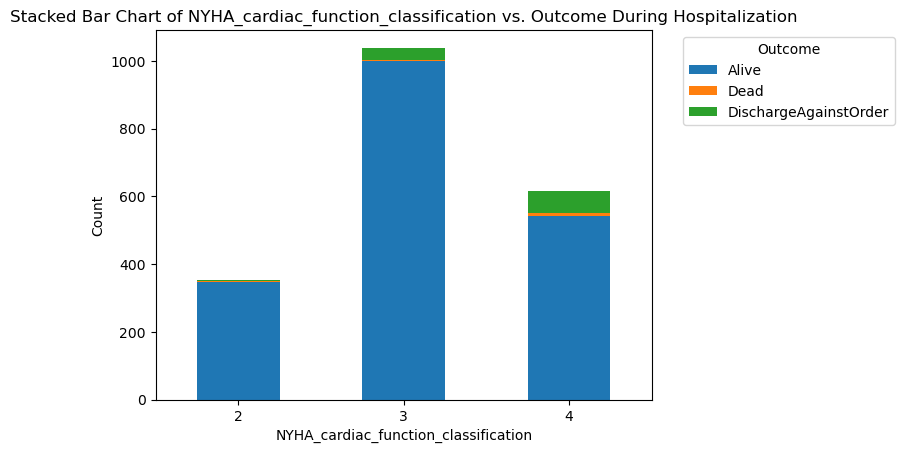

In [13]:
#4.Stacked Bar Chart of NYHA_cardiac_function_classification vs. Outcome During Hospitalization

import pandas as pd
import matplotlib.pyplot as plt




merged_data = pd.merge(df_CC[['inpatient_number', 'NYHA_cardiac_function_classification']], 
                        df_HD[['inpatient_number', 'outcome_during_hospitalization']],
                        on='inpatient_number', how='inner')


grouped_counts = merged_data.groupby(['NYHA_cardiac_function_classification', 'outcome_during_hospitalization']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of NYHA_cardiac_function_classification vs. Outcome During Hospitalization')
plt.xlabel('NYHA_cardiac_function_classification')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left') 
autopct='%1.1f%%'

plt.show()

In [14]:
#5. Uniformizing BMI Column  2 digit before decimaland 2 digit after decimal.
df=df_Demography
BMI=df['BMI']
Inpatient_no=df['inpatient_number']
df2 = pd.DataFrame({'inpatient_number': Inpatient_no, 'BMI': BMI})
print(df2)

def uniformize_bmi(bmi):
   
    bmi_str = f'{bmi:.2f}'  
    
    
    integer_part, decimal_part = bmi_str.split('.')
    
    
    if len(integer_part) > 2:
       
        integer_part = integer_part[-2:]
    
   
    uniform_bmi = float(f'{integer_part}.{decimal_part}')
    
    return uniform_bmi


print(df_Demography.columns)


df_Demography['BMI'] = df_Demography['BMI'].apply(uniformize_bmi)


print(df_Demography)

      inpatient_number    BMI
0               857781  18.59
1               743087  19.20
2               866418  24.22
3               775928  22.49
4               810128  31.63
...                ...    ...
2003            740689  15.56
2004            734280  20.81
2005            781004  25.95
2006            744870  17.78
2007            791864  18.73

[2008 rows x 2 columns]
Index(['inpatient_number', 'gender', 'weight', 'height', 'BMI', 'occupation',
       'ageCat'],
      dtype='object')
      inpatient_number  gender  weight  height    BMI     occupation ageCat
0               857781    Male    50.0    1.64  18.59  UrbanResident  69-79
1               743087  Female    51.0    1.63  19.20  UrbanResident  69-79
2               866418    Male    70.0    1.70  24.22         farmer  59-69
3               775928    Male    65.0    1.70  22.49  UrbanResident  69-79
4               810128  Female    76.0    1.55  31.63  UrbanResident  69-79
...                ...     ...     ...   

In [15]:
#6.Correlation between fibrinogen  and high_sensitivity_protein show the scatter plot	Correlation between fibrinogen  and high_sensitivity_protein show the scatter plot																									

df = pd.DataFrame({
    'fibrinogen':df_Labs['fibrinogen'],
    'high_sensitivity_protein':df_Labs['high_sensitivity_protein'],
  
})
corr = df.corr()

print("Corelation value of fibrinogen and high_sensitivity_protein:",round(corr['fibrinogen']['high_sensitivity_protein'],4))
corr.style.background_gradient(cmap='coolwarm')

Corelation value of fibrinogen and high_sensitivity_protein: 0.6002


,fibrinogen,high_sensitivity_protein
fibrinogen,1.000000,0.600154
high_sensitivity_protein,0.600154,1.000000


Corelation value of total_protein and globulin: 0.7402203579088964


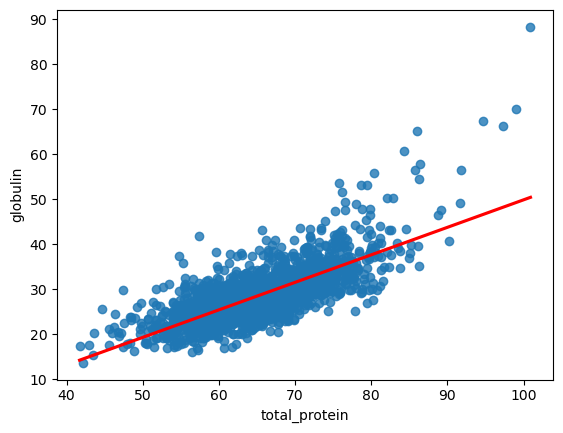

In [16]:
#7.Correlation between total_protein  and globulin show the scatter plot	Correlation between fibrinogen  and high_sensitivity_protein show the scatter plot																									

df = pd.DataFrame({
    'total_protein':df_Labs['total_protein'],
    'globulin':df_Labs['globulin'],
  
})
corr = df.corr()
x_data=df['total_protein']
y_data=df['globulin']
print("Corelation value of total_protein and globulin:",corr['total_protein']['globulin'])
sns.regplot(x=x_data, y=y_data, ci=False, line_kws={'color':'red'});



Percentage of patients in each category of CCI score(1-5)


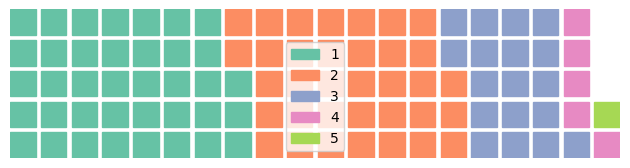

In [10]:
#8.Percentage of patients in each category CCI score 
df_CCI=df_PH['CCI_score']

grouping = df_PH.groupby(["CCI_score"])["CCI_score"].count()

Total = int(df_PH['CCI_score'].shape[0])
CCISCORE1=int(df_PH[df_PH.CCI_score == 1].shape[0])
CCISCORE2=int(df_PH[df_PH.CCI_score == 2].shape[0])
CCISCORE3=int(df_PH[df_PH.CCI_score == 3].shape[0])
CCISCORE4=int(df_PH[df_PH.CCI_score == 4].shape[0])                    
CCISCORE5=int(df_PH[df_PH.CCI_score == 5].shape[0])  

PCCISCORE1= round(((CCISCORE1/Total)*100),1)
PCCISCORE2= round(((CCISCORE2/Total)*100),1)
PCCISCORE3= round(((CCISCORE3/Total)*100),1)
PCCISCORE4= round(((CCISCORE4/Total)*100),1)
PCCISCORE5= round(((CCISCORE5/Total)*100),1)

Percent_data_value=list((PCCISCORE1,PCCISCORE2,PCCISCORE3,PCCISCORE4,PCCISCORE5))
labels_cci=list((1,2,3,4,5))
print("Percentage of patients in each category of CCI score(1-5)")

fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 5, 
    values = Percent_data_value, 
   # labels = list(Percent_data_value) 
    labels = list(labels_cci)
) 



In [7]:
#9.if outcome is ALIVE how many readmission in the category of 28 days 3month 6 months
patients_readmiss_total=df_HD[(df_HD['outcome_during_hospitalization']=='Alive') & (df_HD['re_admission_within_28_days'] == 1)
& (df_HD['re_admission_within_3_months']==1)& (df_HD['re_admission_within_6_months']==1)]
patients_readmiss_total_num=len(patients_readmiss_total)
patients_readmiss_total_num

129

In [10]:
#10.if outcome is ALIVE how many death in the category of 28 days 3month 6 month
patients_dead1=df_HD[(df_HD['outcome_during_hospitalization']=='Alive') & (df_HD['death_within_28_days'] == 1)]
patients_dead2=df_HD[(df_HD['outcome_during_hospitalization']=='Alive') &  (df_HD['death_within_3_months']==1)]
patients_dead3=df_HD[(df_HD['outcome_during_hospitalization']=='Alive') &(df_HD['death_within_6_months']==1)]
patients_dead1_num=len(patients_dead1)
patients_dead2_num=len(patients_dead2)
patients_dead3_num=len(patients_dead3)
total_dead_num= patients_dead1_num + patients_dead2_num +patients_dead3_num
total_dead_num

45

In [13]:
#11Finding out who has maximum BMI value old age category.

#finding oldest age group
oldest_age=df_Demography['ageCat'].max()
print(oldest_age)
#patients in oldest age group
oldest_patients = df_Demography[df_Demography['ageCat'] == oldest_age]
print(oldest_patients)
#Heighest BMI patient in oldest age group
Max_BMI = oldest_patients.loc[oldest_patients['BMI'].idxmax()]
print(Max_BMI)
Max_BMI= df_Demography ['BMI'].value_counts()


89-110
      inpatient_number  gender  weight  height        BMI     occupation  \
11              748109  Female    45.0    1.56  18.491124  UrbanResident   
15              852562  Female    40.0    1.53  17.087445  UrbanResident   
31              814480  Female    60.0    1.60  23.437500  UrbanResident   
35              821472  Female    50.0    1.50  22.222222  UrbanResident   
67              865930  Female    49.0    1.50  21.777778  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
1930            828982  Female    55.0    1.60  21.484375  UrbanResident   
1939            784500    Male    60.0    1.70  20.761246  UrbanResident   
1946            843892  Female    48.0    1.40  24.489796  UrbanResident   
1954            813910    Male    50.0    1.56  20.545694  UrbanResident   
1999            804209  Female    40.0    1.55  16.649324  UrbanResident   

      ageCat  
11    89-110  
15    89-110  
31    89-110  
35    89-110  
67   